In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

training=pd.read_csv(r'C:\Users\sharm\Desktop\Titanic dataset\train.csv')
testing=pd.read_csv(r'C:\Users\sharm\Desktop\Titanic dataset\test.csv')

training['train_test']=1
testing['train_test']=0
testing['Survived']=np.NaN
entire_data=pd.concat([training,testing])

%matplotlib inline
entire_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [5]:
#Understanding the nature of the data
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [6]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [7]:
#inferences- 342 out of 891 survived 
#numeric columns
training.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

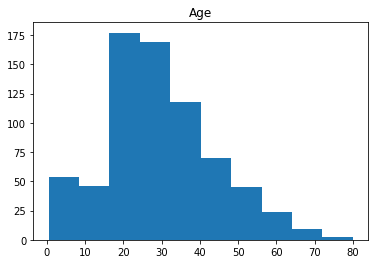

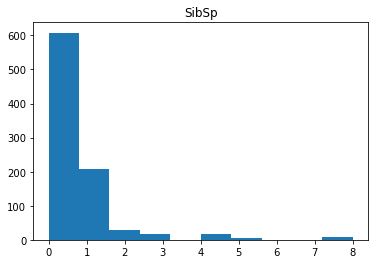

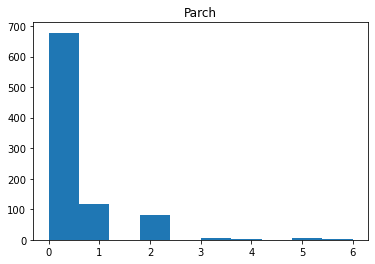

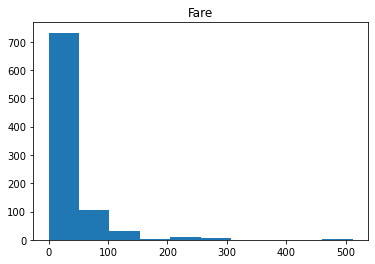

In [8]:
#separating the numeric and the categorical values for clarity 
data_num=training[['Age','SibSp','Parch','Fare']]
data_cat=training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]


#making histogram plots of numerical data
for i in data_num.columns:
    plt.hist(data_num[i])
    plt.title(i)
    plt.show(i)
    


            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

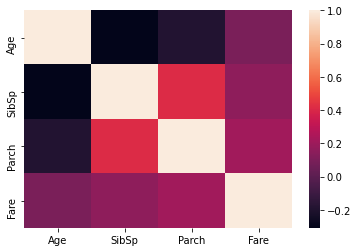

In [9]:
#Checking correlation between the features

print(data_num.corr())
sns.heatmap(data_num.corr())

In [10]:
#comparing survival rate across age,siblings,parents,fare

pd.pivot_table(training,index='Survived',values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [11]:
#making bar plots of the categorical values to observe distributions across each category 
#Error in plotting using sns.. type error 'Int64Index',I was trying to plot the same data below with y axis showing the index and x axis reflecting the columns

#using a pivot table for the reading the same data 

#Comparing survival chances on the basis of categorical data 

print(pd.pivot_table(training,index='Survived',columns='Pclass',values='PassengerId',aggfunc='count'))
print(pd.pivot_table(training,index='Survived',columns='Sex',values='PassengerId',aggfunc='count'))
print(pd.pivot_table(training,index='Survived',columns='Embarked',values='PassengerId',aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Sex       female  male
Survived              
0             81   468
1            233   109
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [26]:
#feature engineering 

#further classifying the Cabin data on the basis of number of cabins booked, the split function will end creating a list of the cabins booked//simplification of cabin 
data_cat.Cabin
training['cabin_multiple']=training.Cabin.apply(lambda x:0 if pd.isna(x) else len(x.split(' ')))
training['cabin_multiple'].value_counts()


0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [16]:
pd.pivot_table(training, index = 'Survived', columns = 'cabin_multiple', values = 'PassengerId' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [17]:
#feature enggineering the cabin data on the basis of the letter// simplification of cabin's impact

training['cabin_adv']=training.Cabin.apply(lambda x:str(x)[0])
print(training.cabin_adv.value_counts())
pd.pivot_table(training,index='Survived',columns='cabin_adv',values='PassengerId',aggfunc='count')



n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [21]:
#numeric ticket vs non-numeric
#errors while manipulating the non-numeric data types of the Ticket feature
training['numeric_ticket']=training.Ticket.apply(lambda x:1 if x.isnumeric() else 0)
training['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [23]:
pd.pivot_table(training,index='Survived',columns='numeric_ticket',values='PassengerId',aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [24]:
#Manipulation of non-numeric data type of Ticket done

training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

pd.set_option("max_rows", None)
training['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
c              5
fcc            5
wep            3
sopp           3
pp             3
sotono2        2
ppp            2
scah           2
swpp           2
fc             1
scow           1
casoton        1
sop            1
sca4           1
as             1
fa             1
scahbasle      1
sc             1
sp             1
Name: ticket_letters, dtype: int64

In [25]:
pd.pivot_table(training,index='Survived',columns='ticket_letters',values='PassengerId',aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [29]:
#Feature engineering the names of the passengers to see if the title of the person impacts his/her survival

training['name_titles']=training.Name.apply(lambda x:x.split(',')[1].split('.')[0].strip())
training['name_titles'].value_counts()


Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Don               1
the Countess      1
Sir               1
Lady              1
Ms                1
Mme               1
Jonkheer          1
Capt              1
Name: name_titles, dtype: int64

In [32]:
pd.pivot_table(training,index='Survived',columns='name_titles',values='PassengerId',aggfunc='count')

name_titles,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


(889,)

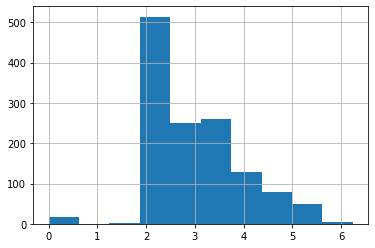

In [40]:
#Data preprocessing
#drop null values from the Embarked(only 2), do not drop null values from Cabin, as they are used to define a new feature cabin_adv
#include all variables except PassengerId and Name,creating categorical data of the rest as done above for those 3
#tbc


#Creating categorical variables for both training and testing 
#Cabin
entire_data['cabin_multiple']=training.Cabin.apply(lambda x:0 if pd.isna(x) else len(x.split(' ')))
entire_data['cabin_adv']=training.Cabin.apply(lambda x:str(x)[0])
#Ticket
entire_data['numeric_ticket']=training.Ticket.apply(lambda x:1 if x.isnumeric() else 0)
entire_data['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
#Name
entire_data['name_titles']=training.Name.apply(lambda x:x.split(',')[1].split('.')[0].strip())


#input null data for continuous data,replacing them with medians, could also use means
#entire_data.Age=entire_data.Age.fillna(training.Age.mean())
entire_data.Age=entire_data.Age.fillna(training.Age.median())
#entire_data.Fare=entire_data.Fare.fillna(training.Fare.median())
entire_data.Fare=entire_data.Fare.fillna(training.Fare.median())


#dropping the rows where Embarked has no values, only 2, that will leave us with 889 rather than 891 observations
entire_data.dropna(subset=['Embarked'],inplace=True)

#log norm of fare
entire_data['norm_fare']=np.log(entire_data.Fare+1)
entire_data['norm_fare'].hist()


#Creating dummy variables
#could apply OneHotEncoder, but lack deep knowledge of the same
all_dummies = pd.get_dummies(entire_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_titles','train_test']])

#splitting train-test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)


y_train = entire_data[entire_data.train_test==1].Survived
y_train.shape


In [42]:
#Scaling data 

from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
all_dummies_scaled=all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]=scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_train_scaled=all_dummies_scaled[all_dummies_scaled.train_test==1].drop(['train_test'],axis=1)
X_test_scaled=all_dummies_scaled[all_dummies_scaled.train_test==0].drop(['train_test'],axis=1)

y_train = entire_data[entire_data.train_test==1].Survived

In [56]:
#model building to see how models perform with default paramters to obtain baseline performance, no model tuning can be done now as the knowledge about model tuning is very limited

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
 


In [44]:
#applying logistic regression
lr = LogisticRegression(max_iter = 2000)
#k folds cross validation with k=5
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80898876 0.81460674 0.80337079 0.82022472 0.85310734]
0.8200596711737447


In [45]:
#applying KNN
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79775281 0.79213483 0.83707865 0.79775281 0.85310734]
0.8155652891512728


In [48]:
#Applying LDA
lda=LinearDiscriminantAnalysis()
cv=cross_val_score(lda,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80898876 0.8258427  0.8258427  0.80337079 0.84745763]
0.8223005141877738


In [50]:
#Applying KNN with 8 neighbors
#non-default
knn8=KNeighborsClassifier(n_neighbors=8)
cv=cross_val_score(knn8,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81460674 0.82022472 0.8258427  0.80337079 0.85875706]
0.8245604011934236


In [54]:
#Applying KNN with 10 neighbors 
#non-default
knn10=KNeighborsClassifier(n_neighbors=10)
cv=cross_val_score(knn10,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83707865 0.83146067 0.83707865 0.79775281 0.84745763]
0.8301656827270996


In [57]:
#Applying QDA 
qda=QuadraticDiscriminantAnalysis()
cv=cross_val_score(qda,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.61235955 0.71910112 0.76966292 0.42134831 0.63276836]
0.6310480543388561


In [ ]:
#models to be applied Random forest,Support vector classifier,XG Boost,Voting classifier for choosing best model 
#Tuning the performance of applied models 